In [1]:
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pytesseract as tes

In [2]:
cap = cv2.VideoCapture("Videos/Full_font1.avi")

In [3]:
# fps =int(cap.get(cv2.CAP_PROP_FPS))
# diap = tqdm(iterable=range(0,fps*40,fps))
# for i in diap:
#     cap.set(cv2.CAP_PROP_POS_FRAMES, i)
#     ret, frame = cap.read()
#     if ret:
#         cv2.imwrite(f"Images/frame{int(i/fps)}.jpg",frame)

In [3]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, frame = cap.read()

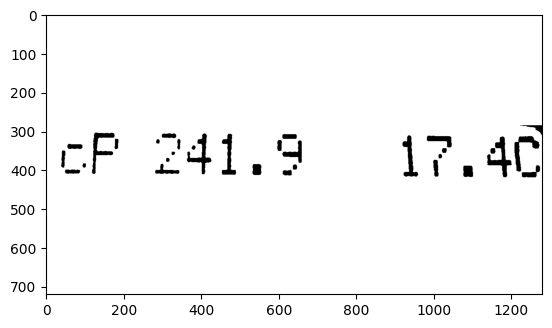

In [12]:
def recognize(image):
    frame_2color = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, frame_bw = cv2.threshold(frame_2color, 127, 255, cv2.THRESH_BINARY)
    return tes.image_to_string(frame_bw)

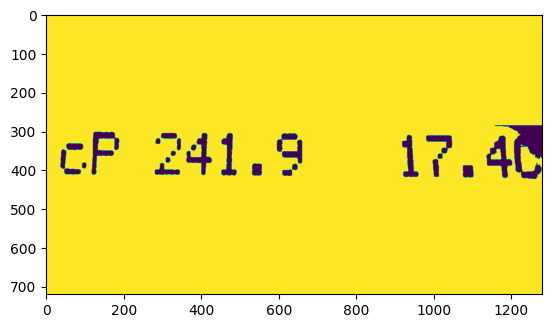

In [8]:
frame_2color = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
thresh, frame_bw = cv2.threshold(frame_2color, 170, 255, cv2.THRESH_BINARY)
plt.imshow(frame_bw)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


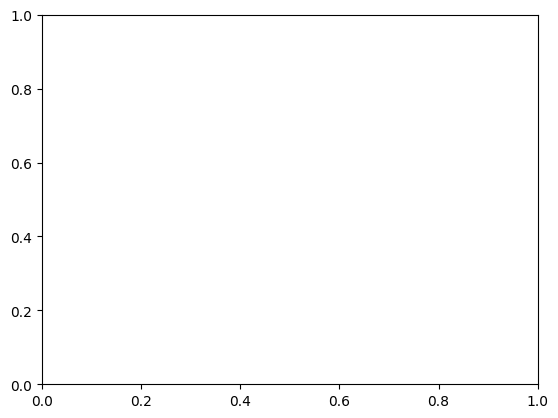

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pytesseract as tes
from matplotlib.widgets import Button, Slider

cap = cv2.VideoCapture("Video_process/Videos/Full_font1.avi")
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, frame = cap.read()

# The parametrized function to be plotted
def apply_thresh(thresh):
    frame_2color = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    thresh, frame_bw = cv2.threshold(frame_2color, thresh, 255, cv2.THRESH_BINARY)
    return frame_bw

# Define initial parameters
thresh = 5

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
image_plot = ax.imshow(apply_thresh(thresh))

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
thresh_slider = Slider(
    ax=axfreq,
    label='Thresh',
    valmin=0,
    valmax=500,
    valinit=thresh,
)

# Make a vertically oriented slider to control the amplitude
# axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
# amp_slider = Slider(
#     ax=axamp,
#     label="Amplitude",
#     valmin=0,
#     valmax=10,
#     valinit=init_amplitude,
#     orientation="vertical"
# )


# The function to be called anytime a slider's value changes
def update(val):
    image_plot.autoscale()
    image_plot.set_data(apply_thresh(thresh_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
thresh_slider.on_changed(update)
# amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
# resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
# button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    thresh_slider.reset()
# button.on_clicked(reset)

plt.show()